# Machine Learning I

## Load Dataset

In [1]:
!wget https://github.com/Valentin-Arkov/Analytics/raw/refs/heads/main/Dataset-2025-z.xlsx

--2025-04-05 10:11:52--  https://github.com/Valentin-Arkov/Analytics/raw/refs/heads/main/Dataset-2025-z.xlsx
Resolving github.com (github.com)... 140.82.116.3
Connecting to github.com (github.com)|140.82.116.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/Valentin-Arkov/Analytics/refs/heads/main/Dataset-2025-z.xlsx [following]
--2025-04-05 10:11:52--  https://raw.githubusercontent.com/Valentin-Arkov/Analytics/refs/heads/main/Dataset-2025-z.xlsx
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 6979 (6.8K) [application/octet-stream]
Saving to: ‘Dataset-2025-z.xlsx’

Dataset-2025-z.xlsx 100%[===================>]   6.82K  --.-KB/s    in 0s      

2025-04-05 10:11:52 (60.1 MB/s) - ‘Dataset-2025-z.

In [2]:
import pandas as pd

# Large Dataset

In [4]:
df = pd.read_excel("Dataset-2025-z.xlsx")

In [5]:
df.head()

,ID,Время создания,Рост в сантиметрах: целое число из трех разрядов.,Вес в килограммах: целое число из двух или трех разрядов.,Длина волос в сантиметрах: целое число из одного или двух разрядов.,Пол: М или Ж,Возраст: целое число из двух разрядов.
0,1875776889,2024-10-25 19:03:36,180,100,20,М,22
1,1876069670,2024-10-26 07:52:56,180,94,5,М,33
2,1876127152,2024-10-26 09:53:21,182,74,12,М,22
3,1876279133,2024-10-26 14:11:33,161,46,35,Ж,23
4,1877548815,2024-10-28 08:36:26,185,75,15,М,23


In [6]:
df.drop(columns=['ID'], inplace=True)
df.head()

,Время создания,Рост в сантиметрах: целое число из трех разрядов.,Вес в килограммах: целое число из двух или трех разрядов.,Длина волос в сантиметрах: целое число из одного или двух разрядов.,Пол: М или Ж,Возраст: целое число из двух разрядов.
0,2024-10-25 19:03:36,180,100,20,М,22
1,2024-10-26 07:52:56,180,94,5,М,33
2,2024-10-26 09:53:21,182,74,12,М,22
3,2024-10-26 14:11:33,161,46,35,Ж,23
4,2024-10-28 08:36:26,185,75,15,М,23


In [7]:
df.drop(columns=['Время создания'], inplace=True)
df.head()

,Рост в сантиметрах: целое число из трех разрядов.,Вес в килограммах: целое число из двух или трех разрядов.,Длина волос в сантиметрах: целое число из одного или двух разрядов.,Пол: М или Ж,Возраст: целое число из двух разрядов.
0,180,100,20,М,22
1,180,94,5,М,33
2,182,74,12,М,22
3,161,46,35,Ж,23
4,185,75,15,М,23


In [8]:
df.columns = ['Height', 'Weight', 'Hair', 'Sex', 'Age']

In [9]:
df.head()

,Height,Weight,Hair,Sex,Age
0,180,100,20,М,22
1,180,94,5,М,33
2,182,74,12,М,22
3,161,46,35,Ж,23
4,185,75,15,М,23


In [11]:
import matplotlib.pyplot as plt


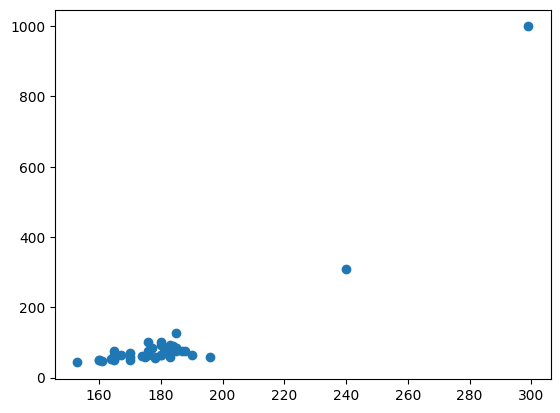

In [12]:
plt.scatter(df.Height, df.Weight)

In [13]:
df = df[df.Height < 220]

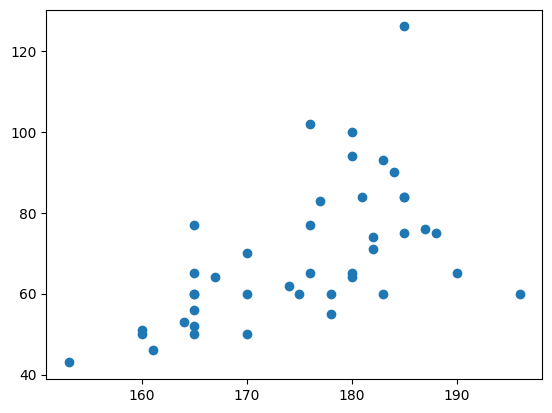

In [14]:
plt.scatter(df.Height, df.Weight)

In [15]:
df['Gender'] = df['Sex'].apply(lambda x: 1 if x == 'М' else 0)
df.head()

,Height,Weight,Hair,Sex,Age,Gender
0,180,100,20,М,22,1
1,180,94,5,М,33,1
2,182,74,12,М,22,1
3,161,46,35,Ж,23,0
4,185,75,15,М,23,1


In [16]:
df.Gender.value_counts()

,count
Gender,
1,32
0,10


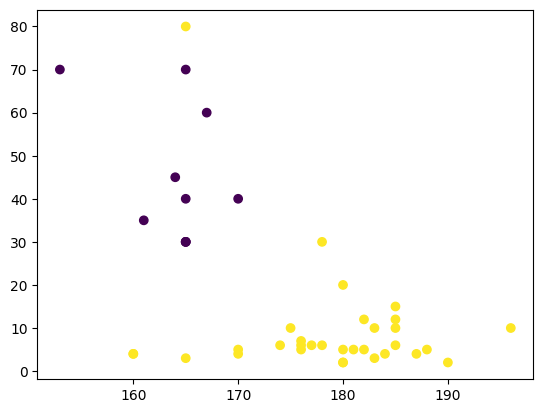

In [17]:
plt.scatter(df.Height, df.Hair, c=df.Gender)

## Clusters

In [18]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

Центры кластеров (центроиды):
Кластер 1: Высота = 177.82, Цвет волос = 9
Кластер 2: Высота = 163.75, Цвет волос = 55


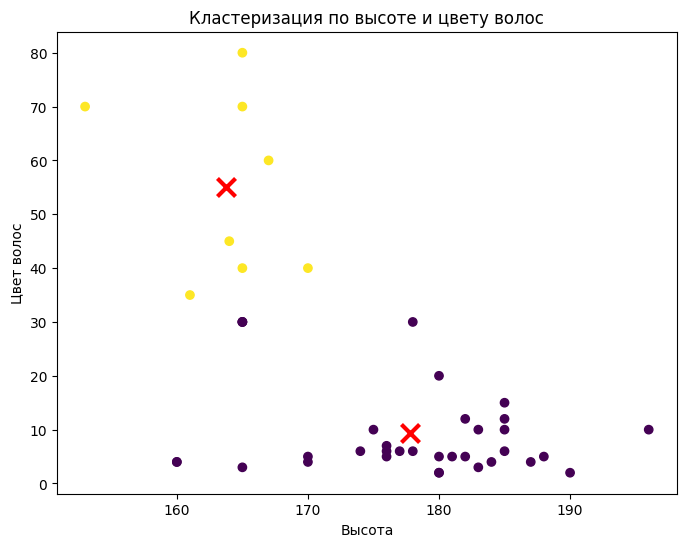

In [19]:
# Кластеризация методом k-средних
kmeans = KMeans(n_clusters=2, random_state=0).fit(df[['Height', 'Hair']])
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

# Добавление меток кластеров к данным
df['Cluster'] = labels

# Вывод центров кластеров (центроидов)
print("Центры кластеров (центроиды):")
for i in range(len(centroids)):
    print(f"Кластер {i+1}: Высота = {centroids[i][0]:.2f}, Цвет волос = {int(centroids[i][1])}")

# Построение графика с результатами кластеризации
plt.figure(figsize=(8, 6))
plt.scatter(df['Height'], df['Hair'], c=df['Cluster'], cmap='viridis')
plt.scatter(centroids[:, 0], centroids[:, 1], marker='x', s=169, linewidths=3,
            color='r', zorder=10)
plt.title('Кластеризация по высоте и цвету волос')
plt.xlabel('Высота')
plt.ylabel('Цвет волос')
plt.show()

In [20]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


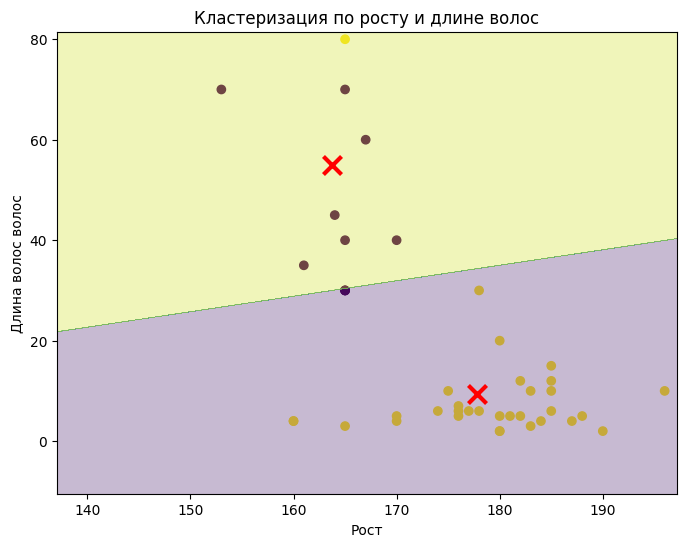

In [23]:
# Генерация искусственных данных для построения границ
X, _ = make_blobs(n_samples=10000, centers=centroids, cluster_std=[5, 7], n_features=2)

# Предсказание кластеров для искусственных данных
predicted_labels = kmeans.predict(X)

# Создание сетки для контурных линий
h = .02  # Шаг сетки
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Получаем предсказания для всех точек сетки
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])

# Приводим предсказания обратно к сетке
Z = Z.reshape(xx.shape)

# Построение графика с результатами кластеризации
plt.figure(figsize=(8, 6))
plt.scatter(df['Height'], df['Hair'], c=df['Gender'], cmap='viridis')
plt.scatter(centroids[:, 0], centroids[:, 1], marker='x', s=169, linewidths=3,
            color='r', zorder=10)

# Добавляем контурные линии для визуализации границ кластеров
plt.contourf(xx, yy, Z, alpha=0.3, cmap='viridis')

plt.title('Кластеризация по росту и длине волос')
plt.xlabel('Рост')
plt.ylabel('Длина волос волос')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.show()

## Classification

In [24]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report

In [25]:
X = df[['Height', 'Hair']]  # Признаки
y = df['Gender']  # Целевой признак (пол)

# Обучение модели логистической регрессии
model = LogisticRegression(random_state=0)
model.fit(X, y)

# Прогнозирование на тестовом наборе
y_pred = model.predict(X)

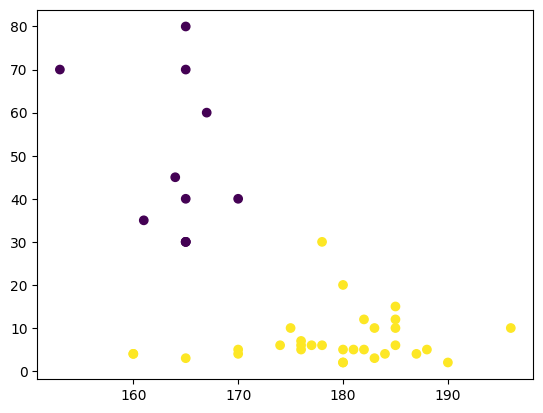

In [27]:
plt.scatter(df['Height'], df['Hair'], c=y_pred)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


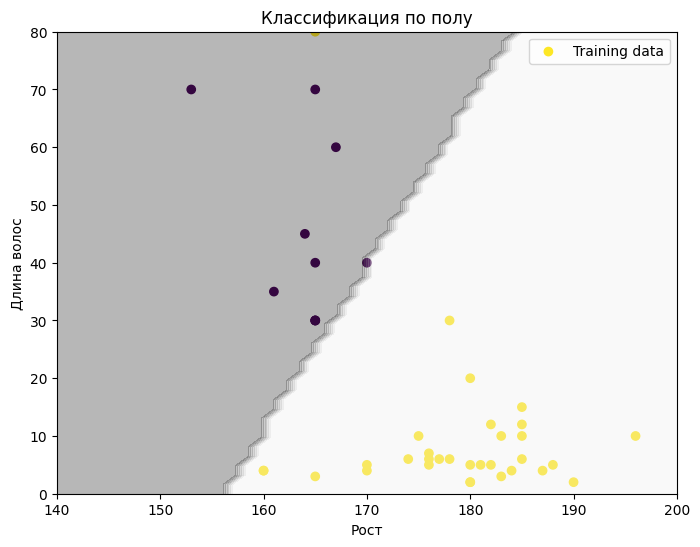

In [29]:
# Создание сетки для построения границы между классами
height_range = np.linspace(140, 200, 50)
hair_range = np.linspace(0, 80, 50)
height_grid, hair_grid = np.meshgrid(height_range, hair_range)

# Объединение сеток в один массив для предсказания
mesh_data = np.c_[height_grid.ravel(), hair_grid.ravel()]

# Прогнозирование значений для всей сетки
mesh_predictions = model.predict(mesh_data)

# Переформатирование результатов в сетку
mesh_predictions = mesh_predictions.reshape(height_grid.shape)

# Построение графика
plt.figure(figsize=(8, 6))
plt.scatter(X['Height'], X['Hair'], c=y, cmap='viridis', label="Training data")

# Нанесение границы между классами
plt.contourf(height_grid, hair_grid, mesh_predictions, alpha=0.3, cmap='gray')

# Настройки графика
plt.title('Классификация по полу')
plt.xlabel('Рост')
plt.ylabel('Длина волос')
plt.legend()
plt.show()

© Арьков В.Ю.